#  EDUNET FOUNDATION-Project Notebook


# GLOBAL PLASTIC POLLUTION ANALYSIS

# Explain about Dataset


In [ ]:
We are using datasets from kaggle which contains data about global 
plastic pollution and analysis and mismanaged by all countries around the globe
and taken country GDP into consideration with the rise in the pollution

Please share your dataset in ur github link 

https://github.com/adarsh852/microsoft-edunet

# EDA

In [1]:
# Importing libraries
import pandas as pd  # Data science essentials
import matplotlib.pyplot as plt  # Essential graphical output
import seaborn as sns  # Enhanced graphical output
import numpy as np
import datetime as dt

# Packages for unsupervised learning
from sklearn.preprocessing import StandardScaler  # Standard scaler
from sklearn.decomposition import PCA  # PCA
from scipy.cluster.hierarchy import dendrogram, linkage  # Dendrograms
from sklearn.cluster import KMeans  # K-means clustering

# Setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Storing the path
file = './Earth_Challenge_Integrated_2015-2018.csv'

# Reading the file into Python with low_memory=False
plastic_pol_original = pd.read_csv(file, low_memory=False)

plastic_pol = plastic_pol_original

# Outputting the first five rows of the dataset
plastic_pol.head(n=5)


X          Y  OBJECTID  RecordSequenceID UniqueID SourceID                                     LocationFreqID                                     Location                         Dataset                                   Organization  Other CountryName_FromSource SubCountry_L1_FromSource SubCountry_L2_FromSource  Longitude1  Latitude1  Longitude2  Latitude2  TotalWidth_m  TotalLength_m  TotalArea_Sq_m     ShorelineName WaterfrontName BeachAreaLandcover BeachType                          EventType  TotalVolunteers            DateOriginal        DateStandardized MonthYear  Year  MonthNum Month  Day StartTime        DOW                                   FieldObsevations                                  DebrisDescription  Totalltems_EventRecord  TotalClassifiedItems_EC2020  PCT_PlasticAndFoam  PCT_Glass_Rubber_Lumber_Metal  SUM_Hard_PlasticBeverageBottle  SUM_Hard_OtherPlasticBottle  SUM_HardOrSoft_PlasticBottleCap  SUM_PlasticOrFoamFoodContainer  SUM_Hard_BucketOrCrate  \
0 -123.435585  38.690549         1               349  MDP-349  40-3153  Blackpoint Beach (Lon -123.4355847 Lat 38.6905...  Blackpoint Beach, Sonoma, CA, United States  NOAA MDMAP Accumulation Survey  California Coast National Monument Task Force    NaN          United States                       CA                   Sonoma -123.435585  38.690549 -123.432939  38.689234        11.887          898.0             NaN  Blackpoint Beach            NaN                NaN       NaN  Marine Debris Accumulation Survey              3.0  2015/01/04 00:00:00+00  2015/01/04 00:00:00+00  Jan-2015  2015         1   Jan    4   4:10 PM     Sunday                                                NaN  On other: 1 plastic wine cork, 1 plastic child...                      28                           24                85.7                           14.3                               1                            0                                1                             0.0                       0   
1 -123.484406  38.728707         2               351  MDP-351  37-3164  Dune Drift Beach (Lon -123.4844062 Lat 38.7287...  Dune Drift Beach, Sonoma, CA, United States  NOAA MDMAP Accumulation Survey  California Coast National Monument Task Force    NaN          United States                       CA                   Sonoma -123.484406  38.728707 -123.487692  38.733347        10.000          190.5             NaN  Dune Drift Beach            NaN                NaN       NaN  Marine Debris Accumulation Survey              1.0  2015/01/10 00:00:00+00  2015/01/10 00:00:00+00  Jan-2015  2015         1   Jan   10  10:00 AM   Saturday                                                NaN                                                NaN                      19                           17                89.5                           10.5                               0                            0                                1                             0.0                       0   
2 -123.456400  38.713200         3               354  MDP-354  59-3175           Ohlson Beach (Lon -123.4564 Lat 38.7132)      Ohlson Beach, Sonoma, CA, United States  NOAA MDMAP Accumulation Survey  California Coast National Monument Task Force    NaN          United States                       CA                   Sonoma -123.456400  38.713200 -123.455100  38.710600        65.000          309.0             NaN      Ohlson Beach            NaN                NaN       NaN  Marine Debris Accumulation Survey              1.0  2015/01/14 00:00:00+00  2015/01/14 00:00:00+00  Jan-2015  2015         1   Jan   14  11:30 AM  Wednesday                                                NaN                                                NaN                       0                            0                 0.0                            0.0                               0                            0                                0                             0.0                       0   
3 -123.490915  38.735105    

In [2]:
# Checking the data types 
# plastic_pol.info(verbose = True)

# Checking for NULL values
plastic_pol.isna().sum(axis = 0)

X                                      0
Y                                      0
OBJECTID                               0
RecordSequenceID                       0
UniqueID                               0
SourceID                            2418
LocationFreqID                         0
Location                            3246
Dataset                                0
Organization                       10801
Other                              54388
CountryName_FromSource              3976
SubCountry_L1_FromSource            6097
SubCountry_L2_FromSource            5664
Longitude1                             0
Latitude1                              0
Longitude2                         49849
Latitude2                          49849
TotalWidth_m                       52267
TotalLength_m                          0
TotalArea_Sq_m                     54388
ShorelineName                      49849
WaterfrontName                     53082
BeachAreaLandcover                 53278
BeachType       

In [3]:
# filling NANs
plastic_pol['ISO_CODE'].fillna(value="unknown", inplace=True)
plastic_pol['COUNTRY'].fillna(value="unknown", inplace=True)
plastic_pol['CONTINENT'].fillna(value="Missing_data", inplace=True)

# verifying
# plastic_pol.isna().sum(axis = 0)

In [4]:
# adding the plastic waste together
plastic_pol["SUM_plastic_waste"] = plastic_pol.loc[:, plastic_pol.columns.str.match('^SUM')].sum(axis=1)

# checking the new column
plastic_pol["SUM_plastic_waste"]

0         23.0
1         17.0
2          0.0
3          8.0
4        892.0
         ...  
54383     35.0
54384     36.0
54385    965.0
54386    125.0
54387    195.0
Name: SUM_plastic_waste, Length: 54388, dtype: float64

In [5]:
# analysing the key metrics
plastic_pol.loc[:,["Totalltems_EventRecord", "TotalClassifiedItems_EC2020", "SUM_plastic_waste"]].describe().round(2)

# every line is a record of littering 


Totalltems_EventRecord  TotalClassifiedItems_EC2020  SUM_plastic_waste
count                54388.00                     54388.00           54388.00
mean                  2551.89                      2353.32            2338.99
std                 139408.60                    134707.87          134687.33
min                      0.00                         0.00               0.00
25%                     22.00                        17.00              16.00
50%                    132.00                       106.00             104.00
75%                    607.00                       502.00             491.00
max               27386329.00                  26420613.00        26418958.00

(array([5.4351e+04, 1.6000e+01, 4.0000e+00, 1.0000e+00, 3.0000e+00,
        3.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

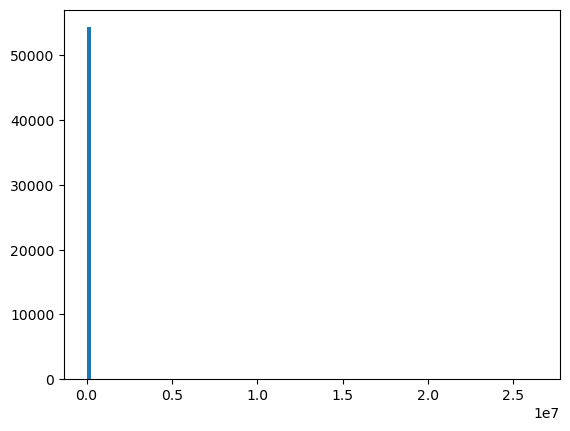

In [6]:
# checking the distribution
plt.hist(plastic_pol["TotalClassifiedItems_EC2020"], bins=100)

(array([5.4381e+04, 3.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([       0. ,  2641895.8,  5283791.6,  7925687.4, 10567583.2,
        13209479. , 15851374.8, 18493270.6, 21135166.4, 23777062.2,
        26418958. ]),
 <BarContainer object of 10 artists>)

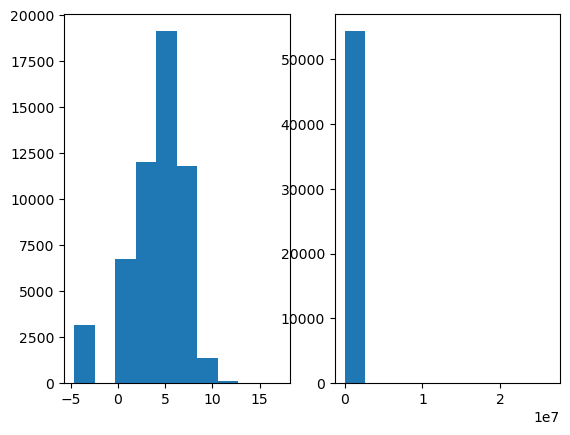

In [7]:
# analysing the distribution
plastic_pol["lg_SUM_plastic_waste"] = np.log(plastic_pol["SUM_plastic_waste"] + 0.01)

plt.subplot(1, 2, 1)
plt.hist(plastic_pol["lg_SUM_plastic_waste"])

plt.subplot(1, 2, 2)
plt.hist(plastic_pol["SUM_plastic_waste"])

In [8]:
# checking the no. of obs
plastic_pol[plastic_pol["SUM_plastic_waste"] > 1000000].shape

(17, 85)

Data Preprocessing - Plastic Pollution Data

In [10]:
plastic_pol["Year"].value_counts()

Year
2018    24785
2017    16529
2016    11141
2015     1933
Name: count, dtype: int64

In [11]:
plastic_data = plastic_pol.loc[:,["DateStandardized", "Totalltems_EventRecord", "TotalClassifiedItems_EC2020", "PCT_PlasticAndFoam", "PCT_Glass_Rubber_Lumber_Metal"]]
plastic_data["Dates"] = pd.to_datetime(plastic_data["DateStandardized"]).dt.date
plastic_data["Dates"] = pd.to_datetime(plastic_data["Dates"])
plastic_data.index = pd.to_datetime(plastic_data["Dates"])
plastic_data.head()
plastic_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 54388 entries, 2015-01-04 to 2015-09-19
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   DateStandardized               54388 non-null  object        
 1   Totalltems_EventRecord         54388 non-null  int64         
 2   TotalClassifiedItems_EC2020    54388 non-null  int64         
 3   PCT_PlasticAndFoam             54388 non-null  float64       
 4   PCT_Glass_Rubber_Lumber_Metal  54388 non-null  float64       
 5   Dates                          54388 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 2.9+ MB


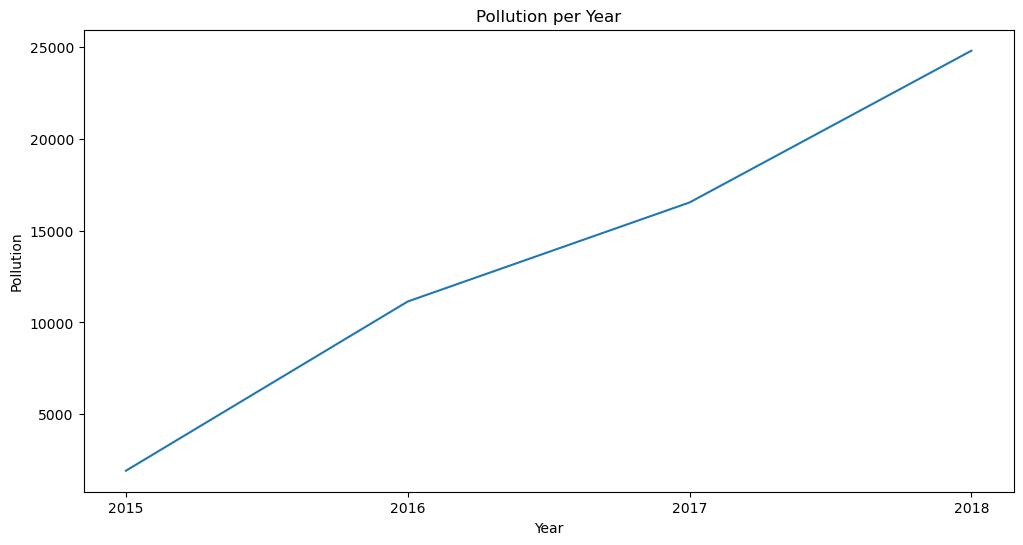

In [12]:
# plotting pollution per year
plt.figure(figsize=(12,6))

yearly_pollution = plastic_data["Dates"].resample("Y").count()
years = [x for x in range(2015, 2019)]
sns.lineplot(x=years, y=yearly_pollution.values)
plt.xlabel("Year")
plt.ylabel("Pollution")
plt.xticks(years, years)
plt.title("Pollution per Year")
plt.show()

In [13]:
# calculating YoY change
yearly_summary = plastic_data[["Dates", "TotalClassifiedItems_EC2020"]]
yearly_summary.head()

Dates  TotalClassifiedItems_EC2020
Dates                                             
2015-01-04 2015-01-04                           24
2015-01-10 2015-01-10                           17
2015-01-14 2015-01-14                            0
2015-01-15 2015-01-15                            8
2015-01-15 2015-01-15                          893

In [ ]:
yearly_summary['difference'] = yearly_summary['TotalClassifiedItems_EC2020'].diff(1)
yearly_summary['YoY%'] = round(yearly_summary['difference']/yearly_summary['TotalClassifiedItems_EC2020']*100,2)
yearly_summary


Since the data is crowded sourced, gaps within the dataset is to be expected. But nevertheless we are seeing a sharp increase (69%) in pollution going into 2018. 


<h3> Plotting GEO data using Plotly</h3>

In [21]:
# Plotting the GIS Data using Plotly
import plotly.express as px
import pandas as pd


Insights:

Proportion of plastic waste (mismanaged or littered) is higher on the east coast than west coast of N.A. 


In [22]:
# GIS Data - Mapped - Worldwide

fig = px.scatter_geo(plastic_pol,lat='Latitude1',lon='Longitude1',color="lg_SUM_plastic_waste")
fig.update_layout(title = 'Proportion of mismanaged or littered plastic waste worldwide', title_x=0.5)
fig.show()

Insights:

Asia and Africa stands out - Therefore: emerging/ developing/ Low income countries have a waste mismanaged waste problem.

Trend: Countries that are either developing or emerging economies are more likely to mismanage their waste. [ASIA & AFRICA]

Research: 
Also, our research revealed that not all the waste in ASIA are generated in ASIA. Most the waste accepted in this region are from the west as these countries prefer to export these waste then recycle them. 


<h2> Plastic Pollution Macroeconomics </h2>

Link to Dataset: [Data](https://ourworldindata.org/)<br>

The main article: [Plastic Pollution](https://ourworldindata.org/plastic-pollution). Created by Hannah Ritchie and Max Roser (2018) - "Plastic Pollution". Published online at OurWorldInData.org. Retrieved from: [Online Resource](https://ourworldindata.org/plastic-pollution) 

Scope of the study:<br>
    <ul> <li>Data collected between 1980 to 2019  </li><br>
    <li>Understand the total waste produced by each country and the total waste mismanaged by the countries </li><br>
    <li>Check the relation between waste and the GDP per capita for each nation</li></ul><br>

In [31]:
# storing the path
file = './per-capita-plastic-waste-vs-gdp-per-capita.csv'

# reading the file into Python
plastic_gdp = pd.read_csv(file)

# outputting the first ten rows of the dataset
plastic_gdp.head(n = 5)

Entity      Code  Year  Per capita plastic waste (kg/person/day)  GDP per capita, PPP (constant 2017 international $)  Population (historical estimates) Continent
0     Abkhazia  OWID_ABK  2015                                       NaN                                                NaN                                  NaN      Asia
1  Afghanistan       AFG  2002                                       NaN                                        1189.784668                           22600774.0       NaN
2  Afghanistan       AFG  2003                                       NaN                                        1235.810063                           23680871.0       NaN
3  Afghanistan       AFG  2004                                       NaN                                        1200.278013                           24726689.0       NaN
4  Afghanistan       AFG  2005                                       NaN                                        1286.793659                           25654274.0       NaN

In [32]:
# renaming the columns 
plastic_gdp.rename(columns={'GDP per capita, PPP (constant 2017 international $)': 'GDP per capita in PPP', 
                   'Population (historical estimates)': 'Total Population',
                    'Per capita plastic waste (kg/person/day)': 'Waste per person(kg/day)'}, inplace=True)


plastic_gdp.head()

Entity      Code  Year  Waste per person(kg/day)  GDP per capita in PPP  Total Population Continent
0     Abkhazia  OWID_ABK  2015                       NaN                    NaN               NaN      Asia
1  Afghanistan       AFG  2002                       NaN            1189.784668        22600774.0       NaN
2  Afghanistan       AFG  2003                       NaN            1235.810063        23680871.0       NaN
3  Afghanistan       AFG  2004                       NaN            1200.278013        24726689.0       NaN
4  Afghanistan       AFG  2005                       NaN            1286.793659        25654274.0       NaN

In [33]:
# removing entities/countries with incomplete/missing data
incomplete_data_index = plastic_gdp[(plastic_gdp['Total Population'].isna()) & (plastic_gdp['GDP per capita in PPP'].isna())].index
plastic_gdp.drop(incomplete_data_index, inplace=True)
plastic_gdp = plastic_gdp.drop(columns='Continent')

In [30]:
# dropping rows with missing per person waste generation values
plastic_gdp = plastic_gdp[plastic_gdp['Waste per person(kg/day)'].notna()]
waste_generated = plastic_gdp.reset_index().drop('index', axis=1)

KeyError: 'Waste per person(kg/day)'

In [ ]:
# loading the mismanaged dataset
plastic_mismanaged = pd.read_csv('./per-capita-mismanaged-plastic-waste-vs-gdp-per-capita.csv')
plastic_mismanaged.head()

# plastic_mismanaged.isna().sum(axis = 0)

In [ ]:
plastic_mismanaged.rename(columns={'Mismanaged plastic waste per capita (kg per year)': 'Mismanaged waste per person(kg/day)',
                     'GDP per capita, PPP (constant 2017 international $)': 'GDP per capita in PPP',
                     'Population (historical estimates)': 'Total Population'}, inplace=True)

plastic_mismanaged.head()

# plastic_mismanaged.drop('Continent', axis=1, inplace=True)
# plastic_mismanaged["Mismanaged waste per person(kg/day)"].sum()


In [27]:
# new dataframe for the required data
data2 = plastic_mismanaged

# dropping rows with missing mismanaged waste values
data2 = data2[data2['Mismanaged waste per person(kg/day)'].isna() != True]
waste_mismanged = data2.reset_index().drop('index', axis=1)

# reviewing the dataset
waste_mismanged.head(n=5)

NameError: name 'plastic_mismanaged' is not defined

In [28]:
# joining both the dataframes
plastic_waste = pd.merge(waste_generated, waste_mismanged, on="Entity")

plastic_waste["GDP per capita in PPP"] = plastic_waste["GDP per capita in PPP_x"] + plastic_waste["GDP per capita in PPP_y"]
plastic_waste["Total Population"] = plastic_waste["Total Population_x"] + plastic_waste["Total Population_y"]

# reviewing the merged dataset
plastic_waste.head()

NameError: name 'waste_generated' is not defined

In [29]:
# rearranging columns in the dataframe
plastic_waste.columns.tolist()
col_list = ['Entity','Code_x','Year_x','Waste per person(kg/day)','Mismanaged waste per person(kg/day)',
           'GDP per capita in PPP','Total Population','Continent']
plastic_waste = plastic_waste[col_list]

# rounding the values per person
plastic_waste.iloc[:, 3:5] = np.around(plastic_waste[['Waste per person(kg/day)', 
                                                      'Mismanaged waste per person(kg/day)']], decimals=2)

# changing datatype
plastic_waste['Total Population'] = plastic_waste['Total Population'].astype(int)

NameError: name 'plastic_waste' is not defined

In [ ]:
plastic_waste['Total waste(kgs/year)'] = ((plastic_waste['Waste per person(kg/day)'] * 
                                    plastic_waste['Total Population']) * 365)
plastic_waste['Total waste mismanaged(kgs/year)'] = ((plastic_waste['Mismanaged waste per person(kg/day)'] * 
                                    plastic_waste['Total Population']) * 365)


plastic_waste.head()

Graph 1: Mismanaged waste & GDP

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set(style="whitegrid")

plt.figure(1, figsize=(12, 8))

plt.scatter(plastic_waste['GDP per capita in PPP'], plastic_waste['Mismanaged waste per person(kg/day)'])
plt.title('Waste Mismanaged by GDP', loc='center', fontsize=14)
plt.ylabel('Mismanaged waste per person(kg/day)', loc='center', fontsize=12)
plt.xlabel('GDP per capita in PPP', fontsize=12)

sns.regplot(x='GDP per capita in PPP', y='Mismanaged waste per person(kg/day)', data=plastic_waste,
            scatter_kws={'color': '#F98A59'}, line_kws={'color': '#f1c232'})

plt.show()


Graph 2: Waste Generated & GDP

In [19]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set(style="whitegrid")

plt.figure(2, figsize=(12, 8))

plt.scatter(plastic_waste['GDP per capita in PPP'], plastic_waste['Waste per person(kg/day)'])
plt.title('Waste Generated by GDP', loc='center', fontsize=14)
plt.ylabel('Waste per person(kg/day)', loc='center', fontsize=12)
plt.xlabel('GDP per capita in PPP', fontsize=12)

sns.regplot(x=plastic_waste['GDP per capita in PPP'], y=plastic_waste['Waste per person(kg/day)'],
            scatter_kws={'color': '#CD212A'}, line_kws={'color': '#f1c232'})

plt.show()


NameError: name 'plastic_waste' is not defined

<Figure size 1200x800 with 0 Axes>

<h2>Conclusion:</h2>

From the graphs above we understand that: 
- Mismanaged waste <b><u>does not</u></b> increase with an increase in country's GDP per capita. 
- But Generated waste <b><u>increases</u></b> with increase in a country's GDP. </li><br>

Therefore, the trends and assumptions that were spotted on the crowd sourced GIS data is empirically and statistically significant. Even though countries with higher GDP per capita produces a lot of waste but they are also in a better position to manage and track what percentage of this waste gets missmanaged. On the contary, emerging economies that are in the business of trading plastic waste needs to ensure that system are in place to prevent the imported or generated waste from ending up in the oceans. 

Ultimately, tackling plastic pollution requires a multi-pronged approach. It needs to be tackled at 3 main levels
- At the source: Encourage and invest in companies trying to build more eco-friendly plastic or alternatives
- Limiting usage: Replacing single-use plastic packaging cannot happen overnight. Therefore, as an immediate countermeasure, limiting its use-cases whenever possible seems only realistic
- End-of-life: The only way to make the system circular is to ensure these plastic waste is being repurposed ethically and responsibly. For example: [Turning plastic waste into bricks](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjtv96D1pz5AhWUI0QIHctjDLsQwqsBegQIFhAB&url=https%3A%2F%2Fwww.youtube.com%2Fwatch%3Fv%3DxKTgMogqBxs&usg=AOvVaw2XWtht073UbJVz1_Cndh34) 

            

Calculating Total waste and Total mismanaged waste by country<br>

<ul><li>Total waste equals product of waste generated per person per day and the total population of that country, multiplied by 365 for a year.</li><br>

<li>Total mismanaged waste equals product of mismanaged waste per person a day and the total population of that country, multiplied by 365 for a year.</li></ul><br>


# Feature engineering  

Geographical Location:
Explanation: Pollution levels differ across regions due to factors such as industrialization and waste management practices.
Implementation: The location of a country, as well as its latitude and longitude, can help us understand where plastic pollution is most prevalent.

Pollution Levels:
Explanation: The concentration or total weight of plastic waste can indicate the severity of pollution in a given area.
Implementation: Quantitative measures like 'plastic concentration' can provide us with insights into the extent of plastic pollution.

# Algm Name with detail

In [ ]:
Unsupervised Learning Libraries:
   - StandardScaler from sklearn.preprocessing: Standardizes features by removing the mean and scaling to unit variance.
   - PCA from sklearn.decomposition: Principal Component Analysis, a dimensionality reduction technique.
   - dendrogram and linkage from scipy.cluster.hierarchy: Used for hierarchical clustering dendrograms.
   - KMeans from sklearn.cluster: Implements K-means clustering, a popular unsupervised clustering algorithm.
    
Principal Component Analysis (PCA):
  PCA is a technique used to simplify the complexity in high-dimensional data while retaining trends and patterns. 
It does this by transforming the original variables into a new set of uncorrelated variables called principal components. 
These components capture most of the variation in the data.

K-means Clustering:
  K-means is a method for partitioning a dataset into clusters. 
The algorithm aims to group similar data points into clusters, 
where each cluster is represented by its centroid. 
It works iteratively to assign each data point to the nearest centroid and then updates the centroids 
based on the mean of the assigned points. This process repeats until convergence.



# Result 

<h2>Conclusion:</h2>

From the graphs above we understand that: 
- Mismanaged waste <b><u>does not</u></b> increase with an increase in country's GDP per capita. 
- But Generated waste <b><u>increases</u></b> with increase in a country's GDP. </li><br>

Therefore, the trends and assumptions that were spotted on the crowd sourced GIS data is empirically and statistically significant. Even though countries with higher GDP per capita produces a lot of waste but they are also in a better position to manage and track what percentage of this waste gets missmanaged. On the contary, emerging economies that are in the business of trading plastic waste needs to ensure that system are in place to prevent the imported or generated waste from ending up in the oceans. 

Ultimately, tackling plastic pollution requires a multi-pronged approach. It needs to be tackled at 3 main levels
- At the source: Encourage and invest in companies trying to build more eco-friendly plastic or alternatives
- Limiting usage: Replacing single-use plastic packaging cannot happen overnight. Therefore, as an immediate countermeasure, limiting its use-cases whenever possible seems only realistic
- End-of-life: The only way to make the system circular is to ensure these plastic waste is being repurposed ethically and responsibly. For example: [Turning plastic waste into bricks] 


Calculating Total waste and Total mismanaged waste by country<br>

<ul><li>Total waste equals product of waste generated per person per day and the total population of that country, multiplied by 365 for a year.</li><br>

<li>Total mismanaged waste equals product of mismanaged waste per person a day and the total population of that country, multiplied by 365 for a year.</li></ul><br>


            